<i><b>Notebook created by:</b> Matilda Eriksson, 2020-04-27<br>
    <b>Source of Data:</b> Codecademy.com</i>

# Classifying Tweet Origins with Naive Bayes Classification
This project is a part of the Data Science course I took on Codecademy.com. I will use a Naive Bayes Classifier to predict whether a tweet sentence comes from New York, London or Paris.
<br>
I have three different datasets
- Tweets from Paris
- Tweets from New York
- Tweets from London

I will label them accordingly and then combine them into a single dataset. I will then use SKLearns CountVectorizer and MultinomialNB to train and predict.

In [9]:
import pandas as pd

new_york_tweets = pd.read_json("new_york.json", lines=True)
london_tweets = pd.read_json("london.json", lines=True)
paris_tweets = pd.read_json("paris.json", lines=True)

In [11]:
display(len(new_york_tweets))
display(len(london_tweets))
display(len(paris_tweets))

4723

5341

2510

In [16]:
print(new_york_tweets.columns)
print(new_york_tweets.loc[10]["text"])

Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted',
       'filter_level', 'lang', 'timestamp_ms', 'extended_tweet',
       'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'extended_entities',
       'withheld_in_countries'],
      dtype='object')
Good day please make you tune in Thank you🙏🏿 https://t.co/5zVHN0LQ27


In [17]:
# First turning the text columns into a list
new_york_text = new_york_tweets["text"].tolist()
london_text = london_tweets["text"].tolist()
paris_text = paris_tweets["text"].tolist()

# Combining the lists
all_tweets = new_york_text + london_text + paris_text

# Labeling accordingly
labels = [0] * len(new_york_text) + [1] * len(london_text) + [2] * len(paris_text)

In [18]:
# Separating into train/test splits

from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(all_tweets, labels,test_size=0.2, random_state=1)


In [5]:
# Making the Count Vectors
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

print(train_data[3])
print(train_counts[3])

saying bye is hard. Especially when youre saying bye to comfort.
  (0, 5022)	2
  (0, 6371)	1
  (0, 9552)	1
  (0, 12314)	1
  (0, 13903)	1
  (0, 23994)	2
  (0, 27146)	1
  (0, 29397)	1
  (0, 30274)	1


In [6]:
# Train & Test the NB Classifier
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)

In [7]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, predictions))

0.6779324055666004


The model correctly predicted 68% of the unlabeled tweets. I think that's impressive! Let's see if the correct predictions are evently distributed among the different categories.

The other way you can evaluate your model is by looking at the **confusion matrix**. A confusion matrix is a table that describes how your classifier made its predictions. For example, if there were two labels, A and B, a confusion matrix might look like this:

```
9 1
3 5
```

In this example, the first row shows how the classifier classified the true A's. It guessed that 9 of them were A's and 1 of them was a B. The second row shows how the classifier did on the true B's. It guessed that 3 of them were A's and 5 of them were B's.

For our project using tweets, there were three classes &mdash; `0` for New York, `1` for London, and `2` for Paris. You can see the confustion matrix by printing the result of the `confusion_matrix` function using `test_labels` and `predictions` as parameters.

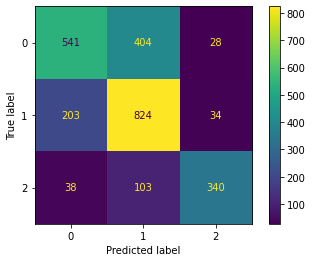

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, test_counts, test_labels)  

In [26]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       973
           1       0.62      0.78      0.69      1061
           2       0.85      0.71      0.77       481

    accuracy                           0.68      2515
   macro avg       0.72      0.68      0.69      2515
weighted avg       0.69      0.68      0.68      2515



Looking at the precision and f1-score, the model is a bit better at predicting tweets from Paris than tweets from London and New York. Makes sense, since the difference in words should be bigger in the Paris Tweets compared to the others. 